<a href="https://colab.research.google.com/github/nuramrina46/SkripsiVGG19/blob/main/Epoch/70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 Augmentasi_DATA.ipynb                              Untitled18.ipynb
'blood-cancer-diagnosis (1).ipynb'                  Untitled19.ipynb
 blood-cancer-diagnosis.ipynb                       Untitled1.ipynb
 CNN_Alzheimer.ipynb                               'Untitled (2)'
 CNN_normalized_lr_1_e5.ipynb                       Untitled20.ipynb
 COV,TB,PNM,NM.ipynb                                Untitled21.ipynb
 Dskin_CNN.ipynb                                    Untitled22.ipynb
 PNEUMONIA/                                         Untitled23.ipynb
'pneumonia_VGG_16_fiX (3).ipynb'                    Untitled24.ipynb
'pneumonia_vgg_19_(2).ipynb'                        Untitled25.ipynb
'Python_Tugas13 (1).ipynb'                          Untitled26.ipynb
 Python_Tugas13.ipynb                               Untitled27.ipynb
 Salinan_dari_AugmentasiAll.ipynb                   Untitled28.ipynb
'Salinan dari Selamat Datang di Colaboratory'       Untitled29.ipynb
'Salinan dari Selamat Datang di Colabo

In [4]:
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import os
import cv2

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("PNEUMONIA")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePaths in imagePaths:
    a = Image.open(imagePaths)
    image = np.array(a.resize((64,64))) / 255.0
    data.append(image)
    
    label = imagePaths.split(os.path.sep) [-2]
    labels.append(label)

In [7]:
temp = np.array(data)
temp = np.expand_dims(temp, axis=3)
print(temp.shape)

(3166, 64, 64, 1)


In [8]:
 from sklearn.preprocessing import LabelBinarizer
import numpy as np

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, label):
      nilaiy = super().transform(label)
      if self.y_type_== 'binary':
        return np.hstack((nilaiy, 1-nilaiy))
      else:
        return nilaiy
    def inverse_transform(self, nilaiy, threshold=None):
      if self.y_type_ == 'binary':
          return super().inverse_transform(nilaiy[:, 0], threshold)
      else:
          return super().inverse_transform(nilaiy, threshold)

lb = MyLabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.20)
print(trainX.shape)
print(testX.shape)

(2532, 64, 64)
(634, 64, 64)


In [10]:
def vgg19(num_classes):

    vgg19 = Sequential()

    #BLOCK1
    #layer1 32*32*64
    vgg19.add(Convolution2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer2 16*16*64
    vgg19.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK2
    #layer3 16*16*128
    vgg19.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer4 8*8*128
    vgg19.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same",))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK3
    #layer5 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer6 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer7 8*8*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer8 4*4*256
    vgg19.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK4
    #layer8 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer9 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer10 4*4*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer11 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    #BLOCK5
    #layer11 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    #layer12 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())    
    #layer13 2*2*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())    
    #layer13 1*1*512
    vgg19.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg19.add(Activation('relu'))
    vgg19.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg19.add(BatchNormalization())

    # seventh block (classifier)
    #layer14 4096
    vgg19.add(Flatten())
    vgg19.add(Dense(units=4096))
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5))
    #layer15 4096
    vgg19.add(Dense(units=4096))
    vgg19.add(Activation('relu')) 
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5))
    #layer16 1000
    vgg19.add(Dense(units=1000))
    vgg19.add(Activation('relu'))
    vgg19.add(BatchNormalization())
    vgg19.add(Dropout(0.5)) 

    vgg19.add(Dense(2, activation="softmax"))

    return vgg19

In [11]:
num_classes=2
vgg19=vgg19(num_classes)
vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                      

In [12]:
#setting hyperparameter, menggunakan Adam
opt = RMSprop(lr=0.0001)
vgg19.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 512)         2359808   
                                                                 
 activation_15 (Activation)  (None, 4, 4, 512)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 512)        0         
 2D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4096)              8392704   
                                                                 
 activatio

In [13]:
#training data
H = vgg19.fit(trainX, trainY, validation_data=(testX, testY), epochs=70, batch_size=16)

Epoch 1/70
159/159 [==============================] - 20s 80ms/step - loss: 0.6568 - accuracy: 0.8017 - val_loss: 2.9885 - val_accuracy: 0.5016
Epoch 2/70
159/159 [==============================] - 11s 69ms/step - loss: 0.6438 - accuracy: 0.8314 - val_loss: 9.4613 - val_accuracy: 0.5016
Epoch 3/70
159/159 [==============================] - 11s 67ms/step - loss: 0.5580 - accuracy: 0.8282 - val_loss: 2.0964 - val_accuracy: 0.7098
Epoch 4/70
159/159 [==============================] - 11s 68ms/step - loss: 0.4567 - accuracy: 0.8752 - val_loss: 0.9819 - val_accuracy: 0.7681
Epoch 5/70
159/159 [==============================] - 11s 68ms/step - loss: 0.4374 - accuracy: 0.8669 - val_loss: 0.9786 - val_accuracy: 0.8785
Epoch 6/70
159/159 [==============================] - 11s 68ms/step - loss: 0.4020 - accuracy: 0.8764 - val_loss: 0.4309 - val_accuracy: 0.9196
Epoch 7/70
159/159 [==============================] - 11s 68ms/step - loss: 0.3231 - accuracy: 0.9005 - val_loss: 0.3364 - val_accuracy:

In [14]:
print("[INFO] evaluating network...")
predictions = vgg19.predict(testX, batch_size=16)
pred=predictions.argmax(axis=1)
testY_argm=testY.argmax(axis=1)


[INFO] evaluating network...


In [15]:
print(classification_report(testY_argm,pred,target_names=lb.classes_))

              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       318
   Pneumonia       0.95      0.95      0.95       316

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



In [16]:
test_score = vgg19.evaluate(testX, testY) 
print("Test Loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

20/20 [==============================] - 2s 55ms/step - loss: 0.6313 - accuracy: 0.9495
Test Loss 0.6313, accuracy 94.95%


In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap='Blues'):
  if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Normalized confusion matrix
[[0.95 0.05]
 [0.05 0.95]]


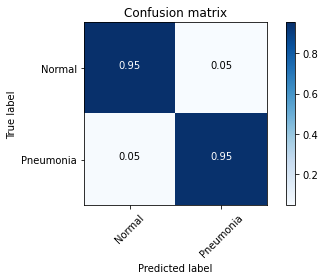

Confusion matrix, without normalization
[[303  15]
 [ 17 299]]


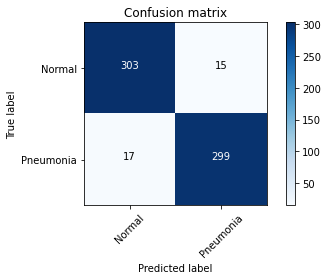

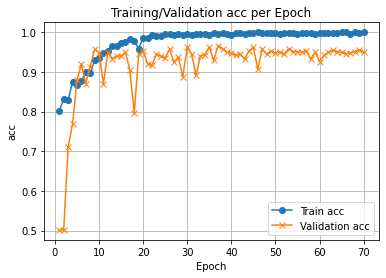

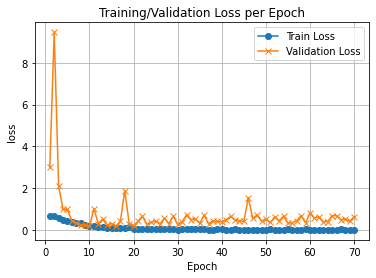

In [18]:
cnf_matrix = confusion_matrix(testY_argm, pred)
np.set_printoptions(precision=2)

# Plot non/normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=True)
plt.show()

plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=False)
plt.show()

f, ax = plt.subplots()
ax.plot([None] + H.history['accuracy'], 'o-')
ax.plot([None] + H.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.grid(True)

f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.grid(True)